In [1]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

In [2]:
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.float_format', '{:,.2f}'.format)
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_pickle('C:\projects\Cafe\Analysis\data')

In [4]:
df.head()

,rnm,num_check,datetime,time_eat,smena,good,total_chek,price,pr_bez_nds,avg_price,profit,amount,position_good,summa,payment,check_unique,group,on-group,seasons,day,hour,date,revenue,mnth,quart
0,6916860058096,92970,2024-01-09 08:06:00,Ранний завтрак,240,Яичница с беконом,181.00,45.00,37.50,22.95,14.55,1.00,1,181.00,card,92970 - 6916860058096,Завтрак,Яичница,Зима,Вторник,8,2024-01-09,37.50,Январь,1 Квартал
1,6916860058096,92970,2024-01-09 08:06:00,Ранний завтрак,240,Сосиски отварные,181.00,65.00,54.17,23.78,30.39,1.00,2,181.00,card,92970 - 6916860058096,Основное блюдо,Колбаски разные,Зима,Вторник,8,2024-01-09,54.17,Январь,1 Квартал
2,6916860058096,92970,2024-01-09 08:06:00,Ранний завтрак,240,Каша овсяная на молоке,181.00,65.00,54.17,13.75,40.42,1.00,3,181.00,card,92970 - 6916860058096,Завтрак,Каши,Зима,Вторник,8,2024-01-09,54.17,Январь,1 Квартал
3,6916860058096,92970,2024-01-09 08:06:00,Ранний завтрак,240,Хлеб ржано-пшеничный,181.00,6.00,5.00,1.84,3.16,1.00,4,181.00,card,92970 - 6916860058096,Хлеб,Хлеб,Зима,Вторник,8,2024-01-09,5.00,Январь,1 Квартал
4,6916860058096,92971,2024-01-09 08:07:00,Ранний завтрак,240,Каша рисовая на молоке,145.00,65.00,54.17,17.42,36.75,1.00,1,145.00,card,92971 - 6916860058096,Завтрак,Каши,Зима,Вторник,8,2024-01-09,54.17,Январь,1 Квартал


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483044 entries, 0 to 483043
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   rnm            483044 non-null  int64         
 1   num_check      483044 non-null  int64         
 2   datetime       483044 non-null  datetime64[ns]
 3   time_eat       483044 non-null  object        
 4   smena          483044 non-null  int64         
 5   good           483044 non-null  object        
 6   total_chek     483044 non-null  float64       
 7   price          483044 non-null  float64       
 8   pr_bez_nds     483044 non-null  float64       
 9   avg_price      483044 non-null  float64       
 10  profit         483044 non-null  float64       
 11  amount         483044 non-null  float64       
 12  position_good  483044 non-null  int64         
 13  summa          483044 non-null  float64       
 14  payment        483044 non-null  object        
 15  

**Анализ цен и поиск выбросов**

In [6]:
df['price'].median()

65.0

In [7]:
df['price'].mean()

82.3224479136476

In [8]:
data = np.array(df['price'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1edd989fe50>,
 'caps': [<matplotlib.lines.Line2D at 0x1edd98af090>,
 'boxes': [<matplotlib.lines.Line2D at 0x1eddff13f90>],
 'medians': [<matplotlib.lines.Line2D at 0x1edd98c4850>],
 'fliers': [<matplotlib.lines.Line2D at 0x1edd98c5310>],
 'means': []}

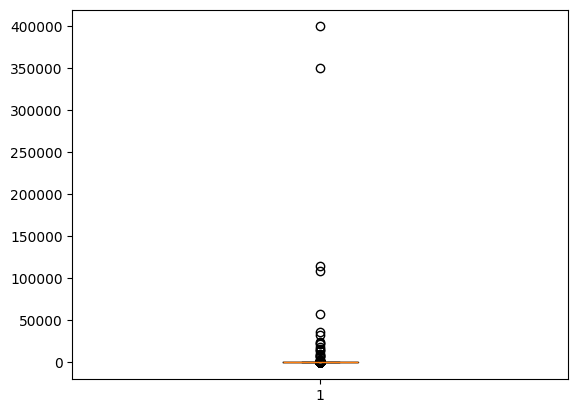

In [9]:
plt.boxplot(data)

In [10]:
df['price'].describe()

count   483,044.00
mean         82.32
std         812.09
min           2.00
25%          40.00
50%          65.00
75%         100.00
max     400,000.00
Name: price, dtype: float64

In [11]:
prc_75 = np.percentile(df['price'], 75)

In [12]:
prc_75

100.0

In [13]:
prc_25 = np.percentile(df['price'], 25)

In [14]:
prc_25

40.0

In [15]:
iqr = prc_75 - prc_25
iqr

60.0

In [16]:
lower_bound = prc_25 - 2.5 * iqr
upper_bound = prc_75 + 2.5 * iqr

In [17]:
print(f"Нижняя граница: {lower_bound}, Верхняя граница: {upper_bound}")

Нижняя граница: -110.0, Верхняя граница: 250.0


In [18]:
price_counts = df.groupby('price').size()

In [19]:
price_counts

price
2.00             1
2.01             1
3.00          2752
3.01            41
3.02             6
              ... 
58,000.00        1
108,820.80       1
114,840.00       1
351,000.00       1
400,000.00       1
Length: 1171, dtype: int64

In [20]:
unique_prices = price_counts[price_counts == 1].index

In [21]:
df_unique = df[df['price'].isin(unique_prices)]

In [22]:
outliers = df_unique[(df_unique['price'] < lower_bound) | (df_unique['price'] > upper_bound)]

In [23]:
outliers[outliers['price'] == 3000]

,rnm,num_check,datetime,time_eat,smena,good,total_chek,price,pr_bez_nds,avg_price,profit,amount,position_good,summa,payment,check_unique,group,on-group,seasons,day,hour,date,revenue,mnth,quart


In [24]:
outliers.groupby(['good', 'price'])['price'].count().sort_values(ascending=False)

good                                                                                                  price     
01.10.2024 Ипатов Н.А.                                                                                35,900.00     1
13.08.2024                                                                                            14,935.00     1
Фуршет Классен 12.02                                                                                  17,940.00     1
Фуршет Барсукова                                                                                      9,240.00      1
Фуршет 15.01                                                                                          13,935.00     1
Фуршет 02.04.24                                                                                       23,720.00     1
УРАЛ-325512-0010-41 Средство транспортное специальное пассажирское № X1P325512B1369640                400,000.00    1
УАЗ-390995 Автомобиль грузовой фургон (XTT390995B0417964)    

In [25]:
outliers['price'].describe()

count        30.00
mean     42,809.91
std      95,042.35
min         260.21
25%       1,150.00
50%       9,770.00
75%      23,960.00
max     400,000.00
Name: price, dtype: float64

In [26]:
get_out = outliers['good'].to_list()

In [27]:
get_out

['Буженина из свиной шеи 1,0 кг',
 'Пирожки 12.01.24',
 'Пицца Римская острая  целая',
 'Фуршет 15.01',
 'Боул с лососем',
 'Фуршет Классен 12.02',
 'Мероприятие Виноградова А.В.',
 'Кр.-манипул.устан. Bonfiglioli P10200L/2',
 '29.03.24 Павел Титоренко',
 'Фуршет 02.04.24',
 'Салат Цезарь с лососем 165 гр',
 'Круассан с лососем',
 'Салат Столичный с курицей 1,0 кг',
 'Фуршет Барсукова',
 'УРАЛ-325512-0010-41 Средство транспортное специальное пассажирское № X1P325512B1369640',
 'Мероприятие 01.08.2024',
 'Боул с лососем',
 '13.08.2024',
 'Боул с лососем',
 'Электростанция дизельная с электростартером и коннектором автоматики DS 7000 DA ES',
 'УАЗ-390995 Автомобиль грузовой фургон (XTT390995B0417964)',
 'Мероприятие 09.09.2024',
 'Мероприятие 16.09.2024',
 '01.10.2024 Ипатов Н.А.',
 'Прицеп-вагон дом  передвижной типа  Сибирь  А8х2,8 на базе тракт.прицепа VIN:1385 (QCS-1-1.2010.054)',
 'Вагончик складской на полозьях',
 'Вагон-дом без шасси бытовка',
 '14.10.2024',
 '21.10.2024',
 '30.10

In [28]:
len(get_out)

30

In [29]:
get_out.remove('Пицца Римская острая  целая')
get_out.remove('Боул с лососем')
get_out.remove('Салат Цезарь с лососем 165 гр')
get_out.remove('Круассан с лососем')
get_out.remove('Салат Столичный с курицей 1,0 кг')
get_out.remove('Боул с лососем')
get_out.remove('Боул с лососем')
get_out.remove('Буженина из свиной шеи 1,0 кг')

In [30]:
get_out

['Пирожки 12.01.24',
 'Фуршет 15.01',
 'Фуршет Классен 12.02',
 'Мероприятие Виноградова А.В.',
 'Кр.-манипул.устан. Bonfiglioli P10200L/2',
 '29.03.24 Павел Титоренко',
 'Фуршет 02.04.24',
 'Фуршет Барсукова',
 'УРАЛ-325512-0010-41 Средство транспортное специальное пассажирское № X1P325512B1369640',
 'Мероприятие 01.08.2024',
 '13.08.2024',
 'Электростанция дизельная с электростартером и коннектором автоматики DS 7000 DA ES',
 'УАЗ-390995 Автомобиль грузовой фургон (XTT390995B0417964)',
 'Мероприятие 09.09.2024',
 'Мероприятие 16.09.2024',
 '01.10.2024 Ипатов Н.А.',
 'Прицеп-вагон дом  передвижной типа  Сибирь  А8х2,8 на базе тракт.прицепа VIN:1385 (QCS-1-1.2010.054)',
 'Вагончик складской на полозьях',
 'Вагон-дом без шасси бытовка',
 '14.10.2024',
 '21.10.2024',
 '30.10.2024']

In [31]:
df_filtered = outliers[~outliers['good'].isin(get_out)]

In [32]:
df_filtered

,rnm,num_check,datetime,time_eat,smena,good,total_chek,price,pr_bez_nds,avg_price,profit,amount,position_good,summa,payment,check_unique,group,on-group,seasons,day,hour,date,revenue,mnth,quart
4796,6916901047427,8831,2024-01-11 10:57:00,Завтрак,238,"Буженина из свиной шеи 1,0 кг","4,000.00","1,000.00",833.33,853.64,-20.31,0.60,4,"4,000.00",cash,8831 - 6916901047427,Основное блюдо,Блюда из свинины,Зима,Четверг,10,2024-01-11,500.00,Январь,1 Квартал
8125,6916901047427,8931,2024-01-12 13:44:00,Обед,239,Пицца Римская острая целая,990.00,385.00,320.83,206.00,114.83,1.00,3,990.00,card,8931 - 6916901047427,Основное блюдо,Пицца,Зима,Пятница,13,2024-01-12,320.83,Январь,1 Квартал
50875,6916901047427,509,2024-02-06 16:08:00,Скидки,7,Боул с лососем,519.00,280.32,233.60,172.47,61.13,1.00,3,519.00,card,509 - 6916901047427,Основное блюдо,Боул,Зима,Вторник,16,2024-02-06,233.60,Февраль,1 Квартал
156003,6916901047427,3584,2024-04-09 17:45:00,Скидки,50,Салат Цезарь с лососем 165 гр,994.00,280.23,233.53,127.14,106.39,1.00,4,994.00,card,3584 - 6916901047427,Салат,Цезарь,Весна,Вторник,17,2024-04-09,233.53,Апрель,2 Квартал
156004,6916901047427,3584,2024-04-09 17:45:00,Скидки,50,Круассан с лососем,994.00,260.21,216.84,123.95,92.89,1.00,5,994.00,card,3584 - 6916901047427,Бутерброд,Круассан,Весна,Вторник,17,2024-04-09,216.84,Апрель,2 Квартал
252378,6916860058096,50621,2024-06-13 09:58:00,Завтрак,92,"Салат Столичный с курицей 1,0 кг","1,340.00",700.00,583.33,153.49,429.84,1.00,2,"1,340.00",card,50621 - 6916860058096,Салат,Прочие,Лето,Четверг,9,2024-06-13,583.33,Июнь,2 Квартал
334271,6916860058096,70576,2024-08-06 16:51:00,Скидки,131,Боул с лососем,287.00,280.59,233.83,176.35,57.48,1.00,1,287.00,card,70576 - 6916860058096,Основное блюдо,Боул,Лето,Вторник,16,2024-08-06,233.83,Август,3 Квартал
353233,6916860058096,75417,2024-08-19 17:14:00,Скидки,140,Боул с лососем,853.00,280.20,233.50,176.35,57.15,1.00,3,853.00,card,75417 - 6916860058096,Основное блюдо,Боул,Лето,Понедельник,17,2024-08-19,233.50,Август,3 Квартал
